In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from primality import primality as pm
import random
from MPS import *
np.set_printoptions(threshold=np.inf)



In [2]:
#Construction of the U Matrix
def get_U_matrices(N,x,bitlength_register_A,bitlength_register_B):
    L = bitlength_register_B
    U = np.zeros((2**L,2**L))
    for i in range(2**L):
        if(i<N):
            U[(i*x)%N,i] = 1
        else:
            U[i,i]=1

    Upow2k= np.zeros((2**L,2**L,bitlength_register_A))
    Upow2k[:,:,0]=U[:,:]
    for i in range(1,bitlength_register_A):
        Upow2k[:,:,i]=np.tensordot(Upow2k[:,:,i-1],Upow2k[:,:,i-1],axes=(1,0))
    return Upow2k

def get_CU_matrices(N,x,bitlength_register_A,bitlength_register_B):
    Upow2k = get_U_matrices(N,x,bitlength_register_A,bitlength_register_B)
    L = bitlength_register_B
    CUpow2k=np.zeros((2**(L+1),2**(L+1),bitlength_register_A))
    for i in range(bitlength_register_A):
        CUpow2k[0:2**L,0:2**L,i]=np.identity(2**L)
        CUpow2k[2**L:2**(L+1),2**L:2**(L+1),i]=Upow2k[:,:,i]
    return CUpow2k


(1, 4, 4, 4, 4, 4, 4, 4, 4) psi shape
MPS shapes
(1, 1)
(1, 4, 2)
(2, 2)
(2, 4, 5)
(5, 5)
(5, 4, 10)
(10, 10)
(10, 4, 37)
(37, 37)
(37, 4, 61)
(61, 61)
(61, 4, 16)
(16, 16)
(16, 4, 4)
(4, 4)
(4, 4, 1)
(1, 1)
MPS shapes
(1, 1)
(1, 2, 2, 2)
(2, 2)
(2, 2, 2, 5)
(5, 5)
(5, 2, 2, 10)
(10, 10)
(10, 2, 2, 37)
(37, 37)
(37, 2, 2, 61)
(61, 61)
(61, 2, 2, 16)
(16, 16)
(16, 2, 2, 4)
(4, 4)
(4, 2, 2, 1)
(1, 1)


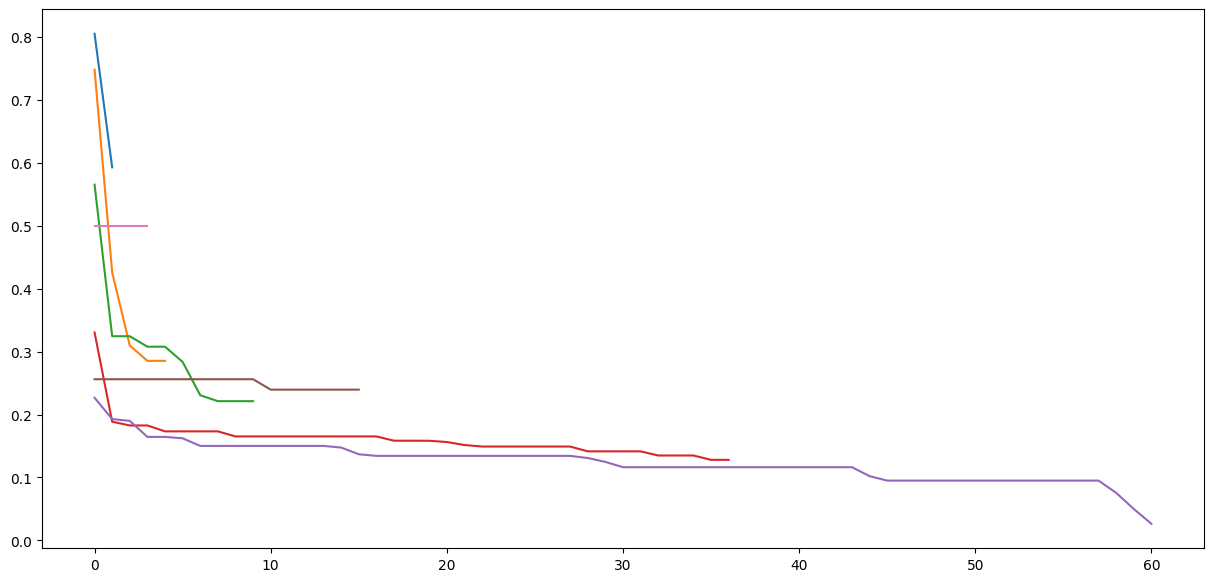

In [3]:
N=13*7
x=16
bitlength_register_A = 1
bitlength_register_B = int(np.ceil(np.log2(N)))
len_total = int(bitlength_register_A+bitlength_register_B)
CUpow2k = get_CU_matrices(N,x,bitlength_register_A,bitlength_register_B)
U = CUpow2k[:,:,0].reshape((2,)*2*len_total)
MPO = to_MPO(U,2**8,1e-8)
print_all_shapes(MPO)
plot_schmidt_values(MPO)

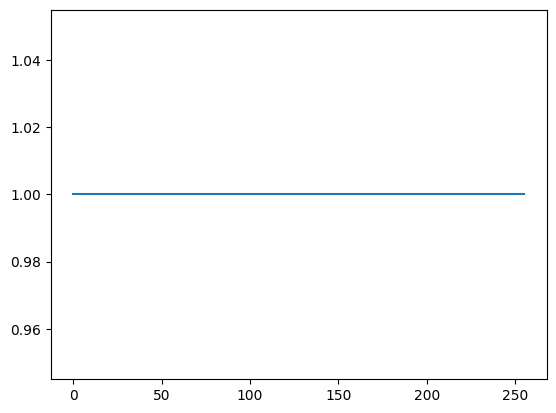

permutation_vec [0, 1, 2, 3, 8, 9, 10, 11, 4, 5, 6, 7, 12, 13, 14, 15, 16]


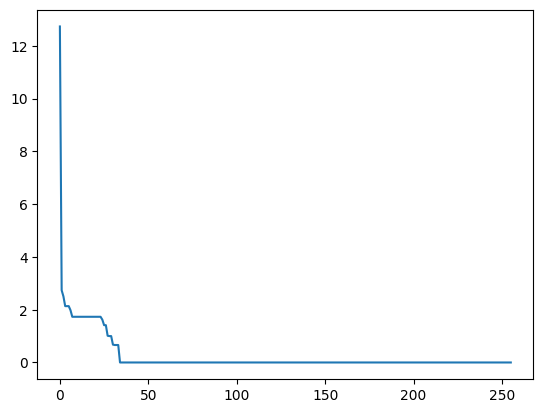

In [4]:
def get_schmidt_values_CU_matrix(N,x,bitlength_register_A,bitlength_register_B):
    L = bitlength_register_B+1
    Lhalf = np.floor((bitlength_register_B+1)/2).astype(int)
    CUpow2k = get_CU_matrices(N,x,bitlength_register_A,bitlength_register_B)
    u,s,v = la.svd(CUpow2k[:,:,0])
    #plot the singular values
    plt.plot(s)
    plt.show()

    CUpow2k = np.reshape(CUpow2k,(2,)*2*L+(bitlength_register_A,))
    permutation_vec = [*range(Lhalf),*range(L,L+Lhalf),*range(Lhalf,L),*range(L+Lhalf,2*L),2*L]
    print("permutation_vec",permutation_vec)
    CUpow2k = np.transpose(CUpow2k,permutation_vec)
    CUpow2k = np.reshape(CUpow2k,(2**L,2**L,bitlength_register_A))
    u,s,v = la.svd(CUpow2k[:,:,0])
    #plot the singular values
    plt.plot(s)
    plt.show()


#test get_schmidt_values_CU_matrix function

N=13*7
x= 5
bitlength_register_A = 1
bitlength_register_B = np.ceil(np.log2(N)).astype(int)
get_schmidt_values_CU_matrix(N,x,bitlength_register_A,bitlength_register_B)
        



In [5]:
#prechecks for N and x
#check if N is of form a^b
def check_ab(N):
    y = np.log2(N)
    for b in range(2,np.ceil(y).astype(int)):
        x = y/b
        u1 = np.floor(2**x).astype(int)
        u2 = np.ceil(2**x).astype(int)
        if(u1**b == N):
            return u1
        if(u2**b == N):
            return u2
    return False    
    
def check_N(N):
    if pm.isprime(N):
        return N
    if N%2==0:
        return 2
    a = check_ab(N)
    if a:
        return a
    
def get_x(N):
    x = random.randint(2,N-1)
    while la.gcd(x,N)!=1:
        x = random.randint(2,N-1)
    return x
    

